In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns

from scipy import stats as st

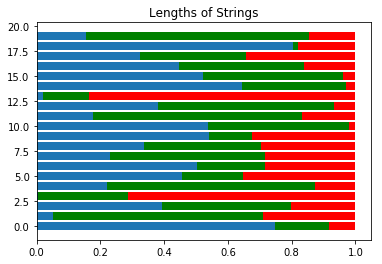

In [2]:
s = st.dirichlet.rvs((1, 1, 1), 20).transpose()
plt.barh(range(20), s[0])
plt.barh(range(20), s[1], left=s[0], color='g')
plt.barh(range(20), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings");

In [3]:
s.shape

(3, 20)

In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

In [5]:
theta = np.random.randn(10000, 3)

In [6]:
p = softmax(theta)

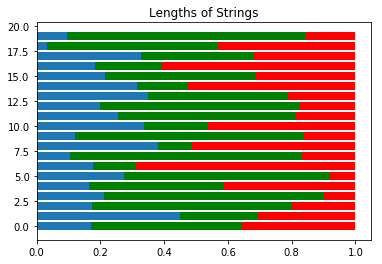

In [7]:
range_ = 20
s = p[:range_].T
plt.barh(range(range_), s[0])
plt.barh(range(range_), s[1], left=s[0], color='g')
plt.barh(range(range_), s[2], left=s[0]+s[1], color='r')
plt.title("Lengths of Strings");

In [8]:
from functools import reduce
_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
        for i in range(3)]


def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    _, axes = plt.subplots(1,2,figsize=(10, 5))
    if barycentric is True:
        X = X.dot(_corners)
        
    sns.kdeplot(X[:, 0], X[:, 1], shade=True, shade_lowest=False, 
                ax=axes[0])
    axes[1].plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    for ax in axes:
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 0.75**0.5)
        ax.axis('equal')
        ax.axis('off')
        if border is True:
            ax.triplot(_triangle, linewidth=1)

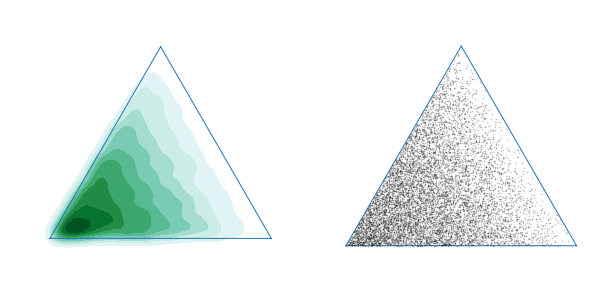

In [9]:
p = st.dirichlet.rvs((2, 1, 1), 10000)
plot_points(p, alpha=.25)

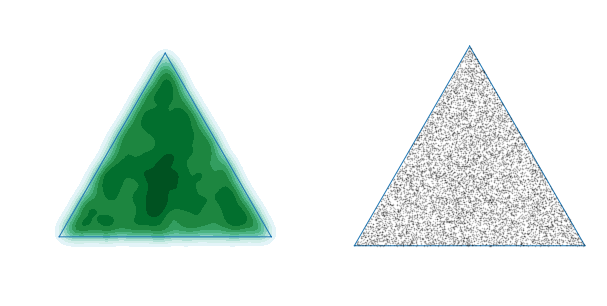

In [10]:
p = st.dirichlet.rvs((1, 1, 1), 10000)
plot_points(p, alpha=.25)

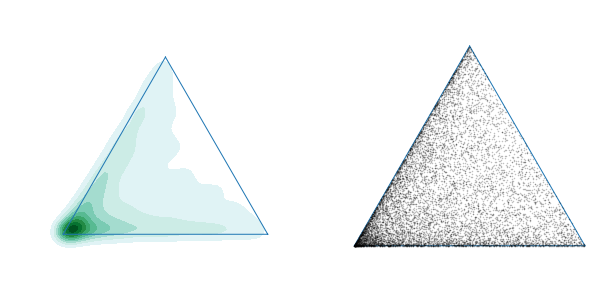

In [11]:
p = st.dirichlet.rvs((1, .5, .5), 10000)
plot_points(p, alpha=.25)

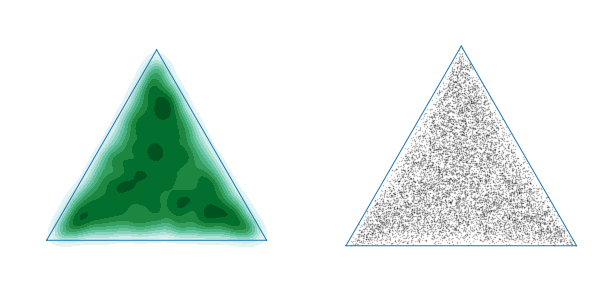

In [12]:
theta = np.random.randn(10000, 3)
p = softmax(theta)
plot_points(p, alpha=.25)

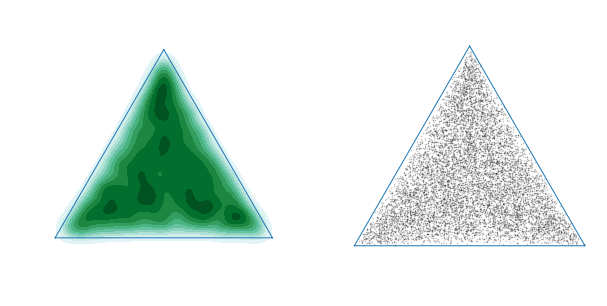

In [13]:
theta = np.random.randn(10000, 3)
p = softmax(theta)
plot_points(p, alpha=.25)

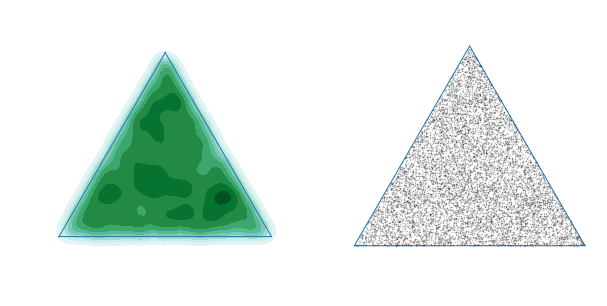

In [14]:
p1 = np.exp(0)
p = st.dirichlet.rvs((p1, p1, p1), 10000)
plot_points(p, alpha=.25)

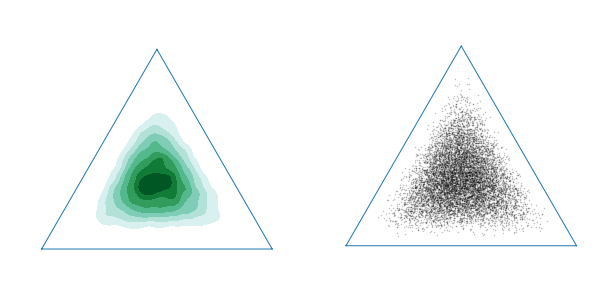

In [15]:
theta = np.random.randn(10000, 3)*.5
p = softmax(theta)
plot_points(p, alpha=.25)

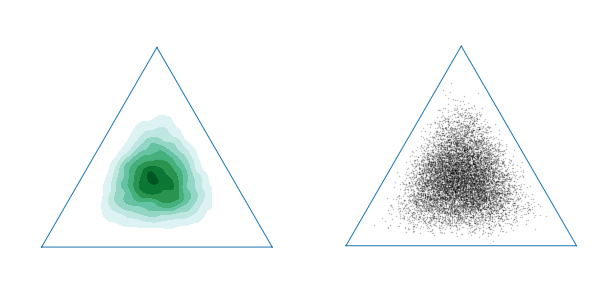

In [16]:
p1 = np.exp(1.5)
p = st.dirichlet.rvs((p1, p1, p1), 10000)
plot_points(p, alpha=.25)

Dirichlet distribution vs Dirichlet process with stick-breaking  
https://discourse.pymc.io/t/dirichlet-mixture-model/1325

In [17]:
def stick_breaking(beta):
    portion_remaining = np.concatenate([np.ones((1, beta.shape[1])),
                                        np.cumprod(1 - beta, axis=0)[:-1]])

    return beta * portion_remaining

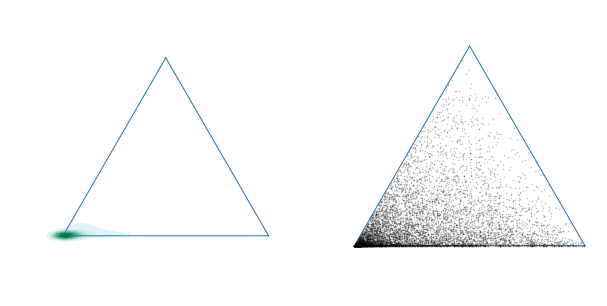

In [18]:
k = 3
size = 10000
a = st.halfnorm.rvs(loc=0., scale=1, size=size)
b = st.beta.rvs(1, a, size=(k, size))
p = stick_breaking(b).T

plot_points(p, alpha=.25)

In [19]:
p = []
for ia in a:
    try:
        p_tmp = st.dirichlet.rvs(np.ones(k)*ia)
    except ZeroDivisionError:
        ia = st.halfnorm.rvs(loc=0., scale=1)
        p_tmp = st.dirichlet.rvs(np.ones(k)*ia)
    p.append(p_tmp)

p = np.squeeze(np.asarray(p))

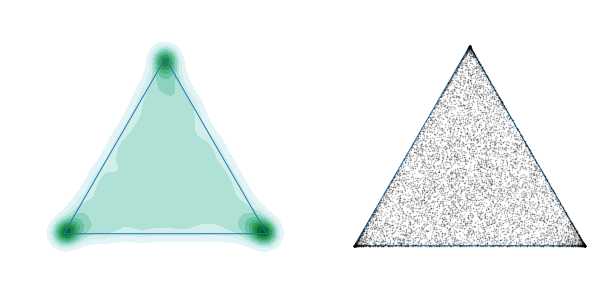

In [20]:
plot_points(p, alpha=.25)

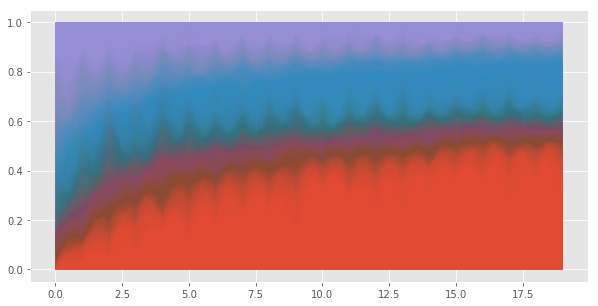

In [12]:
plt.style.use('ggplot')

pmat = np.vstack([np.linspace(1, 20, 20), 
                  np.linspace(2, 10, 20), 
                  np.linspace(3, 5, 20)]).T

p = np.asarray([st.dirichlet.rvs(p_, 200) for p_ in pmat])

_, ax = plt.subplots(1, 1, figsize=(10, 5))
C = ['C0', 'C1', 'C2']
for j in range(200):
    pvec = p[:, j, :]
    pvec_ = np.hstack([np.zeros((20, 1)), np.cumsum(pvec, axis=1)])
    for i in range(3):
        ax.fill_between(np.arange(20), 
                        pvec_[:, i], 
                        pvec_[:, i+1], 
                        alpha=.01, 
                        facecolor=C[i]);